In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/videogamesales/vgsales.csv


In [10]:
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/kaggle/input/videogamesales/vgsales.csv")

In [3]:
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
data.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


the data is between the year 1980 to 2020

In [6]:
data.columns

Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')

**Top 10 Games Globaly**

In [9]:
top10_global = data.sort_values(by="Global_Sales",ascending=False).head(10)
top10_global

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


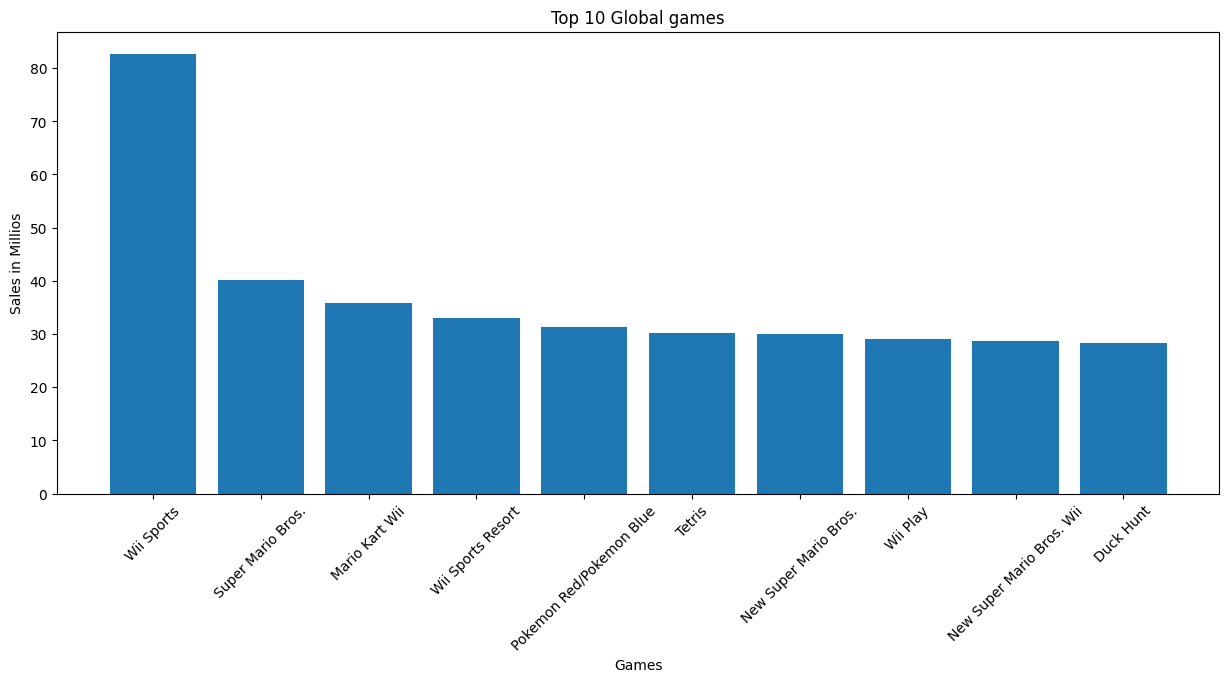

In [22]:
plt.figure(figsize=(15, 6))
plt.bar(top10_global["Name"],top10_global["Global_Sales"])
plt.title("Top 10 Global games")
plt.xlabel("Games")
plt.ylabel("Sales in Millios")
plt.xticks(rotation=45);

top 10 games in North America

In [23]:
top10_NA = data.sort_values(by="NA_Sales",ascending=False).head(10)
top10_NA

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
15,16,Kinect Adventures!,X360,2010.0,Misc,Microsoft Game Studios,14.97,4.94,0.24,1.67,21.82
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
18,19,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.61


In [24]:
top10_EU = data.sort_values(by="EU_Sales",ascending=False).head(10)
top10_EU

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
10,11,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.76
16,17,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.40
19,20,Brain Age: Train Your Brain in Minutes a Day,DS,2005.0,Misc,Nintendo,4.75,9.26,4.16,2.05,20.22
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
14,15,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00


In [25]:
top10_JP = data.sort_values(by="JP_Sales",ascending=False).head(10)

In [26]:
top10_ohters = data.sort_values(by="Other_Sales",ascending=False).head(10)

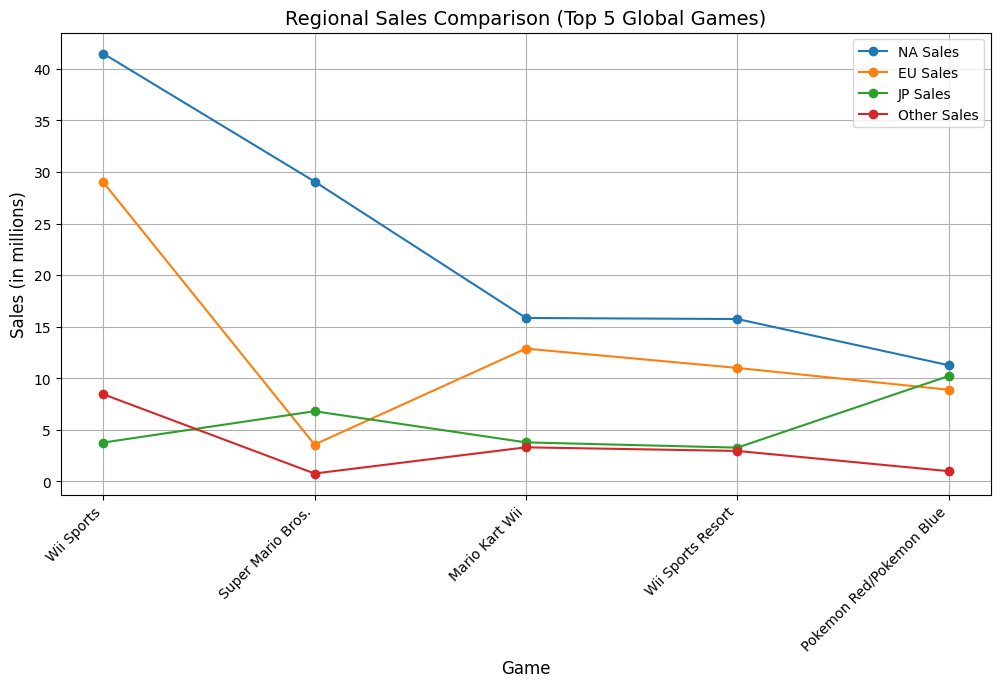

In [33]:
top5 = data.sort_values(by='Global_Sales', ascending=False).head(5)
games = top5['Name']

plt.figure(figsize=(12, 6))
plt.plot(games, top5['NA_Sales'], marker='o', label='NA Sales')
plt.plot(games, top5['EU_Sales'], marker='o', label='EU Sales')
plt.plot(games, top5['JP_Sales'], marker='o', label='JP Sales')
plt.plot(games, top5['Other_Sales'], marker='o', label='Other Sales')
plt.title('Regional Sales Comparison (Top 5 Global Games)', fontsize=14)
plt.xlabel('Game', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.grid(True)
plt.show()

We can see the popularity of game like wii sports in north america and Europe

North America Total Sales: 4392.95 million
Europ Total Sales: 2434.13 million
Japan Total Sales: 1291.02 million
Other Total Sales: 797.75 million


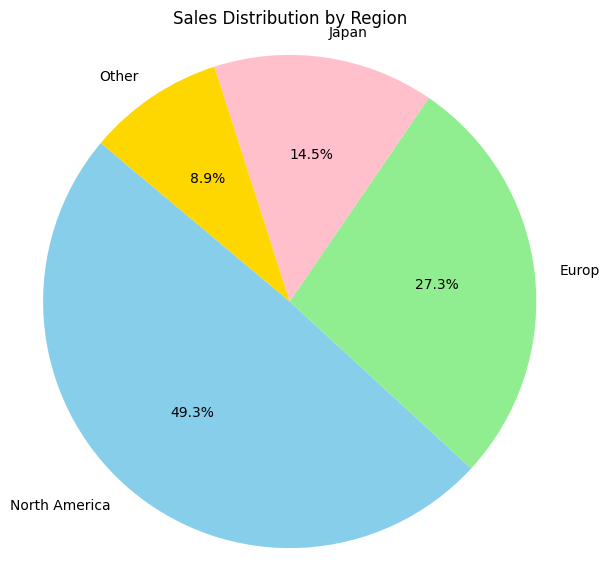

In [41]:
region_totals = {
    'North America': data['NA_Sales'].sum(),
    'Europ': data['EU_Sales'].sum(),
    'Japan': data['JP_Sales'].sum(),
    'Other': data['Other_Sales'].sum()
}

for region, sales in region_totals.items():
    print(f"{region} Total Sales: {sales:.2f} million")

labels = region_totals.keys()
sizes = region_totals.values()

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightgreen', 'pink', 'gold'])
plt.title("Sales Distribution by Region")
plt.axis('equal')
plt.show()


Here North America is the region with the most sales of games globly 

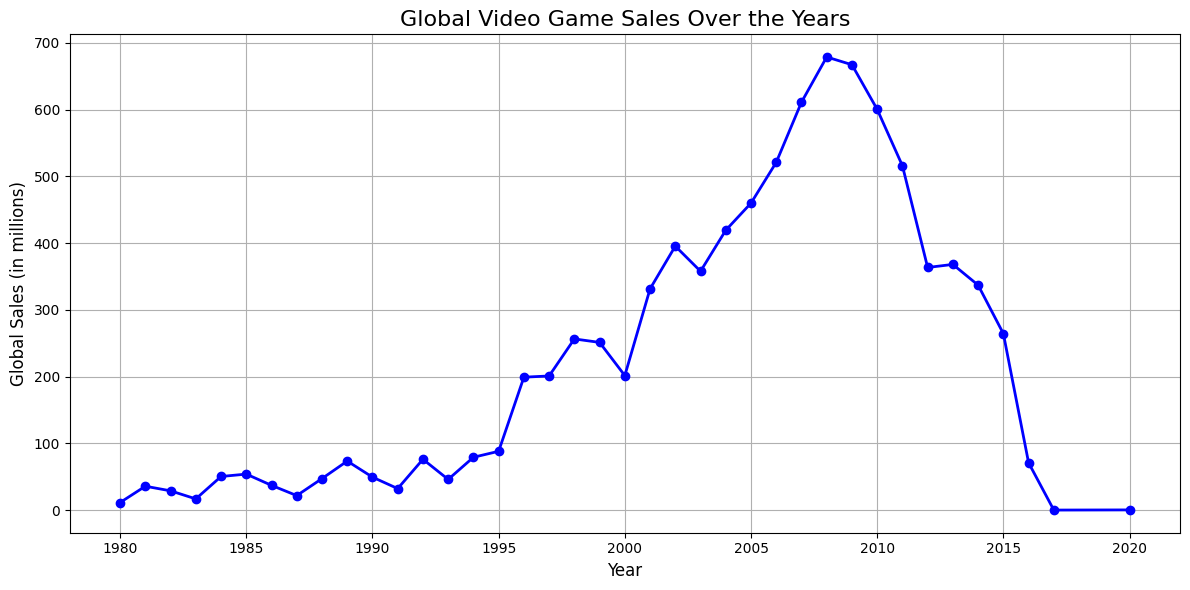

In [48]:
df_clean = data.dropna(subset=['Year'])
global_sales_by_year = df_clean.groupby('Year')['Global_Sales'].sum().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(global_sales_by_year['Year'], global_sales_by_year['Global_Sales'], marker='o', color='blue', linewidth=2)

plt.title('Global Video Game Sales Over the Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (in millions)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

Between 1980 and 1995 we can see the steady growth of games but after 1995 we can see the sales rising up maybe due to the Massive mainstream popularity of games like Wii Sports, Mario Kart Wii, Call of Duty, etc.but again after 2010 we can see the decline of the sales maybe due to the rise in mobile games

In [55]:
top_game = data.loc[data['Global_Sales'].idxmax()]

print("top-Selling Game of All Time:")
print(f"Name      : {top_game['Name']}")
print(f"Platform  : {top_game['Platform']}")
print(f"Year      : {int(top_game['Year'])}")
print(f"Global Sales: {top_game['Global_Sales']} million")

top-Selling Game of All Time:
Name      : Wii Sports
Platform  : Wii
Year      : 2006
Global Sales: 82.74 million


In [58]:
data["NA_Sales"].idxmax()

0

In [67]:
top_genre = data.groupby("Genre")["Global_Sales"].sum().reset_index().head(10)
top_gente_sort = top_genre.sort_values("Global_Sales",ascending=False)

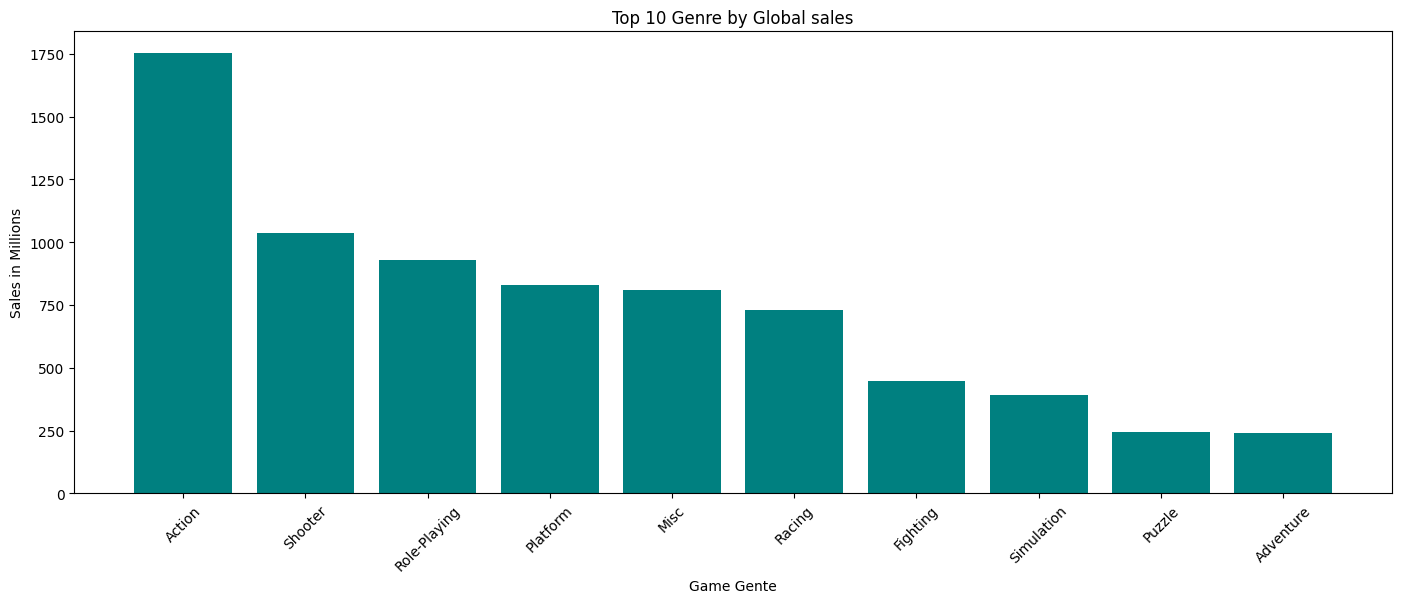

In [74]:
plt.figure(figsize=(17,6))
plt.bar(top_gente_sort["Genre"],top_gente_sort["Global_Sales"],color="teal")
plt.title("Top 10 Genre by Global sales")
plt.xlabel("Game Gente")
plt.ylabel("Sales in Millions")
plt.xticks(rotation=45);

Top perforimg genre globaly is Action and Shooter

In [84]:
top_genre_NA = data.groupby("Genre")["NA_Sales"].sum().reset_index().head(10)
top_gente_sort_NA = top_genre_NA.sort_values("NA_Sales",ascending=False)

top_genre_EU = data.groupby("Genre")["EU_Sales"].sum().reset_index().head(10)
top_gente_sort_EU = top_genre_EU.sort_values("EU_Sales",ascending=False)

top_genre_JP = data.groupby("Genre")["JP_Sales"].sum().reset_index().head(10)
top_gente_sort_JP = top_genre_JP.sort_values("JP_Sales",ascending=False)


In [88]:
merged = pd.merge(top_gente_sort_NA[['Genre', 'NA_Sales']],
                  top_gente_sort_EU[['Genre', 'EU_Sales']],
                  on='Genre', how='outer')

In [89]:
genre_merged= pd.merge(merged,
                      top_gente_sort_JP[['Genre', 'JP_Sales']],
                  on='Genre', how='outer')

In [90]:
genre_merged

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,877.83,525.00,159.95
1,Adventure,105.80,64.13,52.07
2,Fighting,223.59,101.32,87.35
3,Misc,410.24,215.98,107.76
4,Platform,447.05,201.63,130.77
5,Puzzle,123.78,50.78,57.31
6,Racing,359.42,238.39,56.69
7,Role-Playing,327.28,188.06,352.31
8,Shooter,582.60,313.27,38.28
9,Simulation,183.31,113.38,63.70


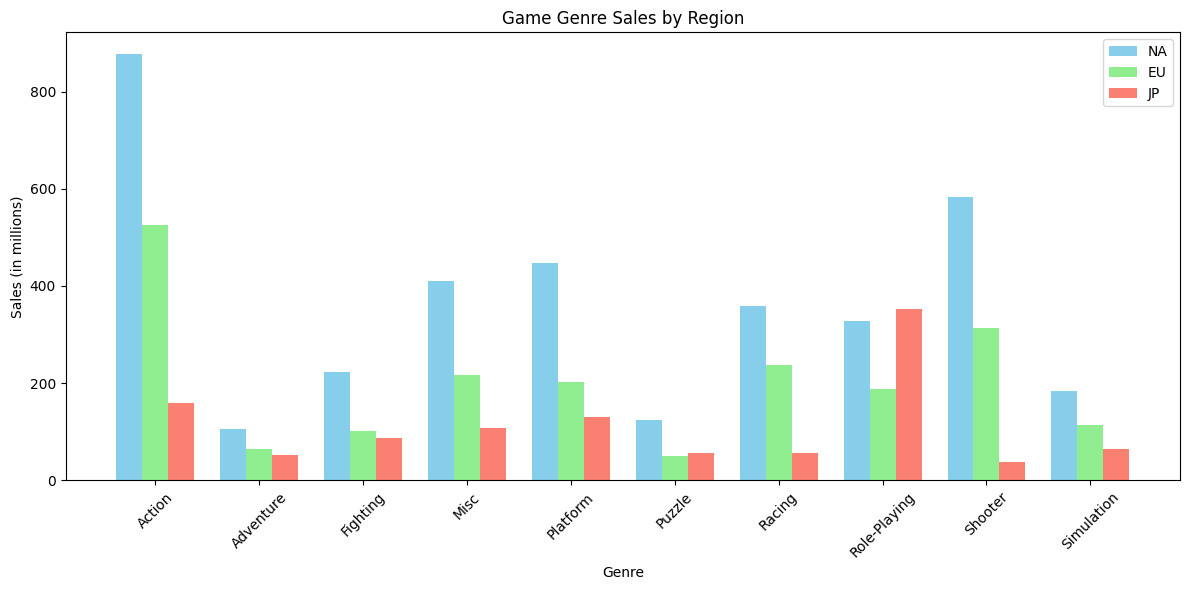

In [91]:
genres = genre_merged['Genre']
x = np.arange(len(genres))
width = 0.25

plt.figure(figsize=(12, 6))
plt.bar(x - width, genre_merged['NA_Sales'], width, label='NA', color='skyblue')
plt.bar(x,         genre_merged['EU_Sales'], width, label='EU', color='lightgreen')
plt.bar(x + width, genre_merged['JP_Sales'], width, label='JP', color='salmon')

plt.xlabel('Genre')
plt.ylabel('Sales (in millions)')
plt.title('Game Genre Sales by Region')
plt.xticks(x, genres, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

There are some genre that are performing great in one region whereas its not performing the same in another region like "Shooter" games are saling more in North America and in Japan in its not performing much

In [98]:
top_publisher = data.groupby("Publisher")["Global_Sales"].sum().reset_index().head(10)
top_publisher.sort_values("Global_Sales",ascending=False)

,Publisher,Global_Sales
6,505 Games,55.91
4,3DO,10.12
2,20th Century Fox Video Games,1.94
7,5pb,1.63
9,989 Sports,0.38
0,10TACLE Studios,0.11
1,1C Company,0.10
8,7G//AMES,0.08
3,2D Boy,0.04
5,49Games,0.04


We can see that 505 Games have the highest Global sales with 55.91 millions

In [105]:
print("Top publisher Game")
top_publisher = data[data['Publisher'] == '505 Games'][['Name', 'Genre', 'Global_Sales']]
top_publisher.sort_values("Global_Sales", ascending = False).head(5)

Top publisher Game


,Name,Genre,Global_Sales
117,Zumba Fitness,Sports,6.81
153,Cooking Mama,Simulation,5.72
355,Cooking Mama 2: Dinner With Friends,Simulation,3.61
491,Cooking Mama: Cook Off,Simulation,2.91
651,Zumba Fitness,Sports,2.39


📝 Analysis Summary
In this project, we conducted an in-depth analysis of global video game sales data by leveraging Python libraries like Pandas and Matplotlib. We began with a descriptive analysis, identifying the top 10 best-selling games globally and by region (North America, Europe, and Japan), with Wii Sports emerging as the highest-selling title. We then examined the total global sales, calculating metrics such as average, median, and standard deviation to better understand sales distribution.

To explore trends over time, we plotted a line graph of global sales by year, which revealed a peak in sales around 2008–2009, followed by a gradual decline post-2010. This trend may indicate a shift toward digital or mobile platforms, which are not fully captured in this dataset.

Next, we analyzed genre-wise performance, both globally and regionally. Bar plots showed that Action, Shooter, and Role-Playing were dominant globally, but regional preferences varied significantly—Japan, for example, showed a strong inclination toward Role-Playing games, while North America and Europe favored Action and Shooter genres.

We then created a merged dataset that compared sales of top genres across regions using a grouped bar chart. This visualization clearly highlighted which genres performed best in each region and where regional differences were most pronounced.

Finally, we identified the top publishers based on global sales. Among them, 505 Games stood out with the highest cumulative sales. We also examined how to retrieve all games associated with a specific publisher, adding a layer of granularity to the publisher-based analysis.

This comprehensive analysis provides valuable insights into market trends, consumer preferences, and historical performance in the video game industry.

